<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preamble" data-toc-modified-id="Preamble-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Preamble</a></span><ul class="toc-item"><li><span><a href="#Some-general-paramaters" data-toc-modified-id="Some-general-paramaters-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Some general paramaters</a></span></li></ul></li><li><span><a href="#Calculating-the-persistence-time-scaling-with-B" data-toc-modified-id="Calculating-the-persistence-time-scaling-with-B-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Calculating the persistence time scaling with B</a></span><ul class="toc-item"><li><span><a href="#An-example" data-toc-modified-id="An-example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>An example</a></span></li><li><span><a href="#Systematic" data-toc-modified-id="Systematic-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Systematic</a></span></li><li><span><a href="#Storage-of-the-plot" data-toc-modified-id="Storage-of-the-plot-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Storage of the plot</a></span></li></ul></li></ul></div>

# Preamble

In [1]:
import  pprint
import  subprocess 
import sys 
sys.path.append('../')

import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 10)

np.set_printoptions(suppress=True, precision=5)

sns.set(font_scale=3.5)
sns.set_style("whitegrid", {'axes.grid': False})

from network import Protocol, NetworkManager, Network
from patterns_representation import PatternsRepresentation
from analysis_functions import calculate_persistence_time, calculate_recall_quantities
from plotting_functions import plot_weight_matrix, plot_network_activity_angle, plot_persistent_matrix

## Some general paramaters

In [2]:
epsilon = 10e-80
vmin = -3.0
remove = 0.005
dt = 0.001

In [3]:
lw = 8
ms = 15
alpha_graph = 0.3
colors = sns.color_palette()

# Calculating the persistence time scaling with B

## An example

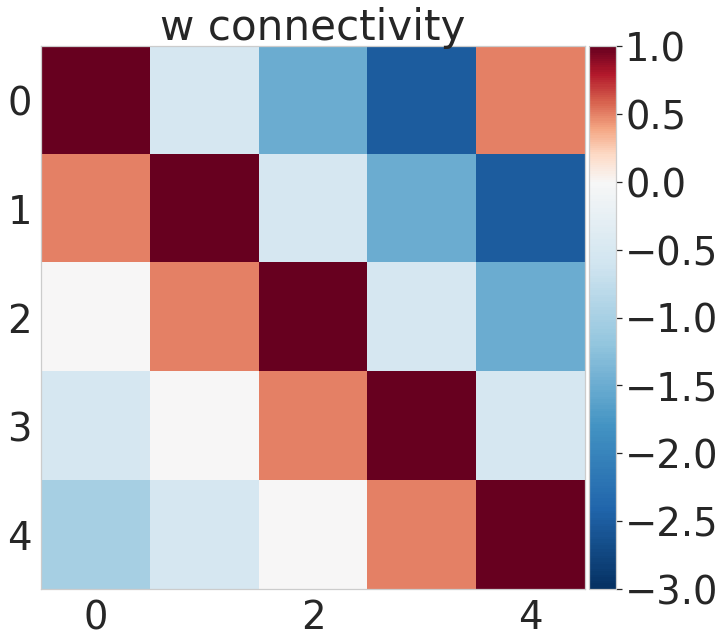

In [4]:
strict_maximum = True

g_a = 1.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = 10

# Training protocol
ws = 1.0
wn = 0.5
wb = -0.5
alpha = 0.5
alpha_back = 1.0


T_persistence = 0.100

# Manager properties
dt = 0.0001
values_to_save = ['o']


# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
             tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
             strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

manager.run_artificial_protocol(ws=ws, wn=wn, wb=wb, alpha=alpha, alpha_back=alpha_back, cycle=False)
nn.w[0, minicolumns - 1] = wn
plot_weight_matrix(manager, one_hypercolum=False, vmin=vmin)

In [5]:
T_saved = 2.4

In [6]:
T_persistence1 = 0.100
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence1)
T_cue = tau_s
T_recall = T_saved + tau_s
I_cue = 0
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux

cmap = matplotlib.cm.binary
o1 = manager.history['o']

In [7]:
T_persistence2 = 0.500
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence2)
T_cue = tau_s
T_recall = T_saved + tau_s
I_cue = 0
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux

cmap = matplotlib.cm.binary
o2 = manager.history['o']

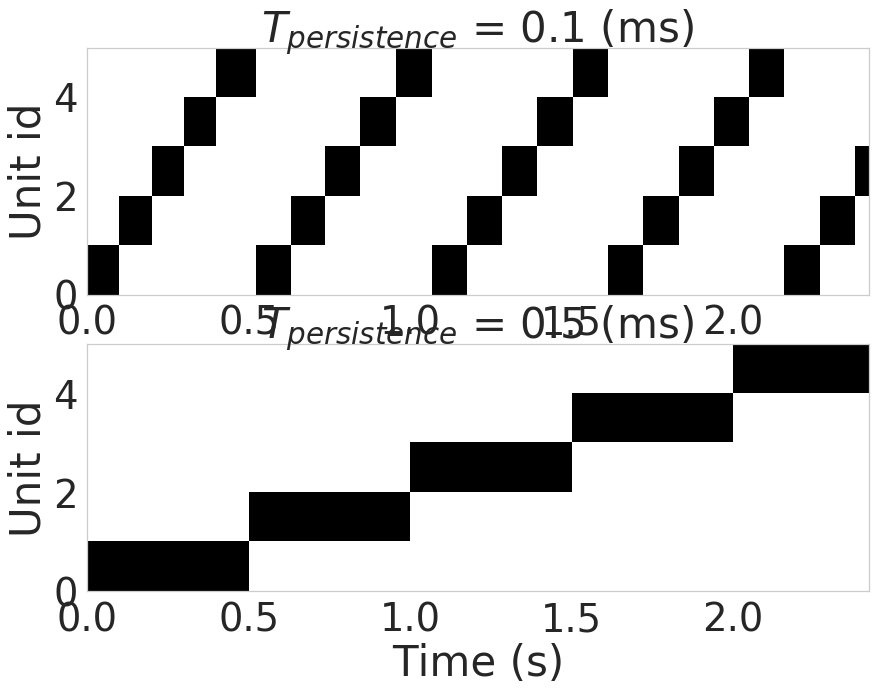

In [8]:
fig = plt.figure()
ax = fig.add_subplot(211)
extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o1.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax.set_ylabel('Unit id')
ax.set_title(r'$T_{persistence}$ = ' + str(T_persistence1) + ' (ms)')

ax = fig.add_subplot(212)
extent = [0, manager.T_recall_total, 0, minicolumns]
ax.imshow(o2.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Unit id')
ax.set_title(r'$T_{persistence}$ = ' + str(T_persistence2) + ' (ms)');

## Systematic

In [9]:
strict_maximum = True

g_a = 1.0
g_I = 2.0
tau_a = 0.250
G = 1.0
sigma_out = 0.0
tau_s = 0.010
tau_z_pre = 0.025
tau_z_post = 0.005

hypercolumns = 1
minicolumns = 5
n_patterns = 10

# Training protocol
ws = 1.0
wn = 0.5
wb = -0.5
alpha = 0.5
alpha_back = 1.0


T_persistence = 0.100

# Manager properties
dt = 0.001
values_to_save = ['o']


# Neural Network
nn = Network(hypercolumns, minicolumns, G=G, tau_s=tau_s, tau_z_pre=tau_z_pre, tau_z_post=tau_z_post,
             tau_a=tau_a, g_a=g_a, g_I=g_I, sigma_out=sigma_out, epsilon=epsilon, prng=np.random,
             strict_maximum=strict_maximum, perfect=False, normalized_currents=True)


# Build the manager
manager = NetworkManager(nn=nn, dt=dt, values_to_save=values_to_save)

manager.run_artificial_protocol(ws=ws, wn=wn, wb=wb, alpha=alpha, alpha_back=alpha_back, cycle=False);

In [10]:
T_persistence = 0.100
manager.set_persistent_time_with_adaptation_gain(T_persistence=T_persistence)
T_cue = tau_s
T_recall = minicolumns * T_persistence + tau_s
I_cue = 0
nr = manager.canonical_network_representation
aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
success, pattern_sequence, persistent_times, timings = aux

In [16]:
%%time
num = 20

B = np.linspace(0.001, 0.90, num=int(0.60 * num))
r = tau_s / tau_a
T_per_set1 = tau_a * np.log(1 / (1 - B)) + tau_a * np.log(1 / (1 - r))

T_per_set2 = np.linspace(0.8, 3.0, num=int(0.40 * num))

T_per_set = np.concatenate((T_per_set1, T_per_set2))

T_sim = np.zeros(num)
B_sim = np.zeros(num)
T_cue = tau_s
I_cue = 0
nr = manager.canonical_network_representation


for index, T_per in enumerate(T_per_set):
    manager.set_persistent_time_with_adaptation_gain(T_persistence=T_per)
    T_recall = T_per * minicolumns + tau_s
    aux = calculate_recall_quantities(manager, nr, T_recall, T_cue, remove=remove, reset=True, empty_history=True)
    success, pattern_sequence, persistent_times, timings = aux    
    T_sim[index] = np.mean(persistent_times[1:-1])
    aux = manager.nn.w[1, 1] - manager.nn.w[2, 1] + manager.nn.beta[1] - manager.nn.beta[2]
    B_sim[index] = aux / manager.nn.g_a

CPU times: user 6.93 s, sys: 4 ms, total: 6.93 s
Wall time: 7 s


In [17]:
T_per_set1

array([0.01046, 0.03179, 0.05512, 0.08086, 0.10955, 0.14196, 0.17921,
       0.223  , 0.27613, 0.34367, 0.43652, 0.58585])

In [18]:
T_per_set2

array([0.8    , 1.11429, 1.42857, 1.74286, 2.05714, 2.37143, 2.68571,
       3.     ])

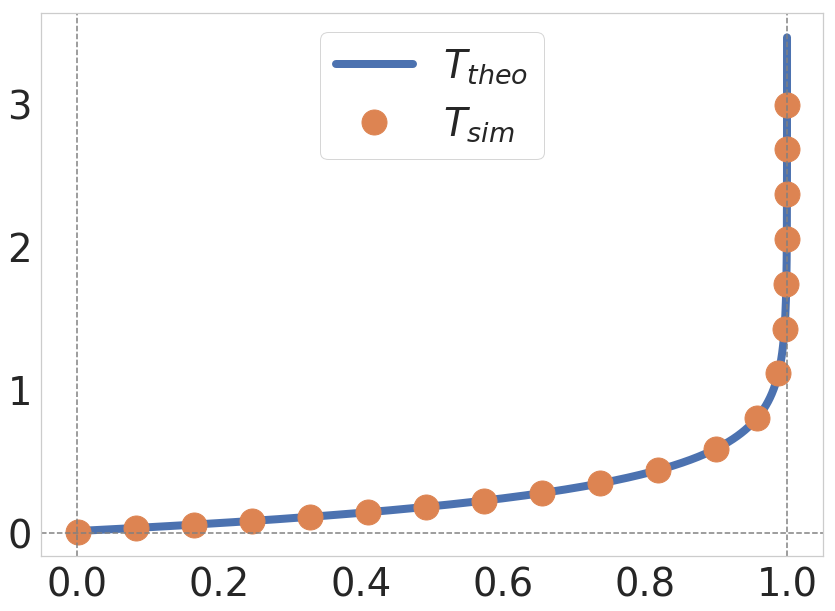

In [19]:
B_theo = 1 - np.logspace(0, -6, num=500)
r = tau_s / tau_a
T = tau_a * np.log(1 / (1 - B_theo)) + tau_a * np.log(1 / (1 - r))

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(B_theo, T, lw=lw, label=r'$T_{theo}$');
ax.plot(B_sim, T_sim, 'o', ms=ms + 10, label=r'$T_{sim}$')

ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.legend();

## Storage of the plot

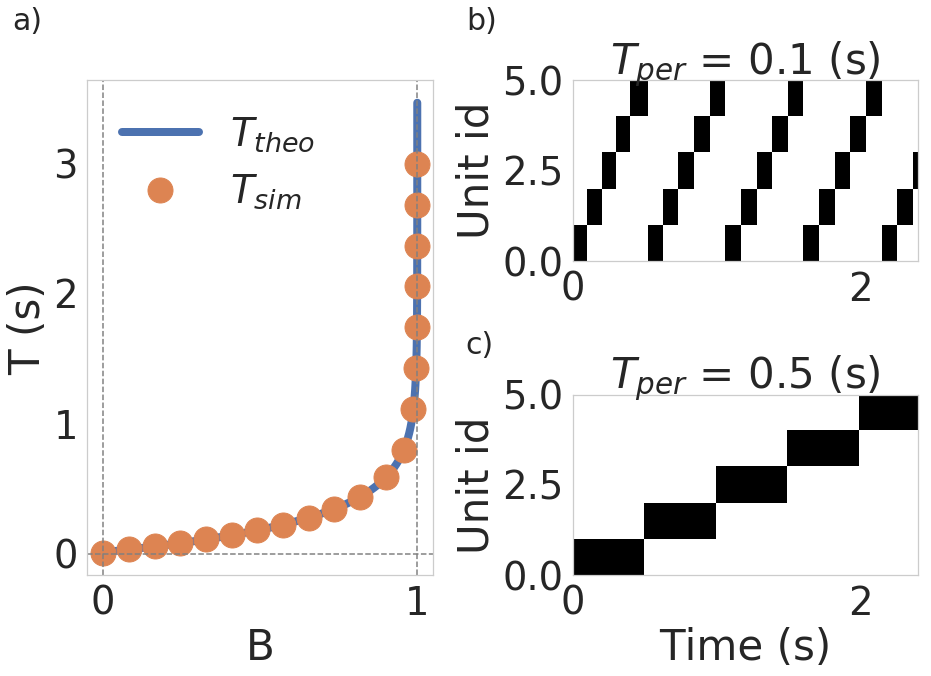

In [22]:
lw = 8
ms = 15
save = True
captions = True
size = 10
show_units = True

fig = plt.figure()
gs = gridspec.GridSpec(2, 2)

# The scaling curve
ax = fig.add_subplot(gs[:, 0])

ax.plot(B_theo, T, lw=lw, label=r'$T_{theo}$');
ax.plot(B_sim, T_sim, 'o', ms=ms + 10, label=r'$T_{sim}$')


ax.set_xlabel('B')
ax.set_ylabel('T (s)')
ax.axhline(0, ls='--', color='gray')
ax.axvline(0, ls='--', color='gray')
ax.axvline(1, ls='--', color='gray')

ax.legend(frameon=False, loc=2);

# First example
ax1 = fig.add_subplot(gs[0, 1])
extent = [0, T_saved, 0, minicolumns]
ax1.imshow(o1.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax1.set_ylabel('Unit id')
ax1.set_title(r'$T_{per}$ = ' + str(T_persistence1) + ' (s)')

if not show_units:
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    
# The second example
ax2 = fig.add_subplot(gs[1, 1])
extent = [0, T_saved, 0, minicolumns]
ax2.imshow(o2.T, cmap=cmap, origin='lower', aspect='auto', extent=extent)

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Unit id')
ax2.set_title(r'$T_{per}$ = ' + str(T_persistence2) + ' (s)')

if not show_units:
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])


fig.tight_layout()

if captions:
    size = 30
    fig.text(0.05, 0.95, 'a)', size=size)
    fig.text(0.50, 0.95, 'b)', size=size)
    fig.text(0.50, 0.50, 'c)', size=size)

if save:
    directory = '../plot_producers/'
    file_name = 'persistent_times'
    format_string = '.pdf'
    string_to_save = directory + file_name + format_string
    fig.savefig(string_to_save, frameon=False, dpi=110, bbox_inches='tight')